<a href="https://colab.research.google.com/github/ShreePurvaja/LinearRegression-ML-Practices/blob/main/Waiter_Tip_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the dependencies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# **Data Collection**

In [2]:
tip=pd.read_csv('/content/tips.csv')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# **Exploratory Data Analysis**

In [3]:
tip.shape

(244, 7)

In [4]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
tip.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [8]:
tip.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


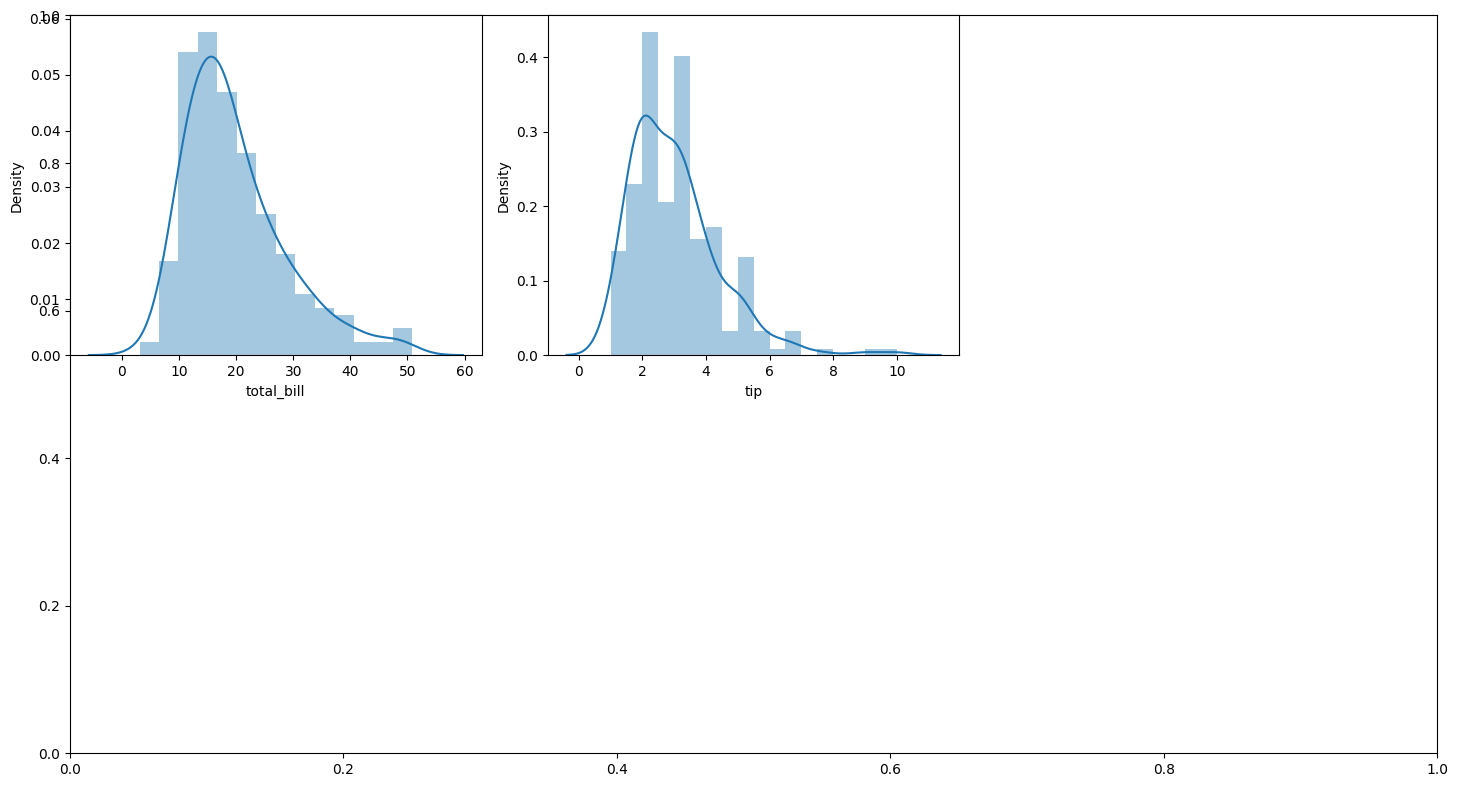

In [15]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sns.distplot(tip[col])
plt.tight_layout()
plt.show()

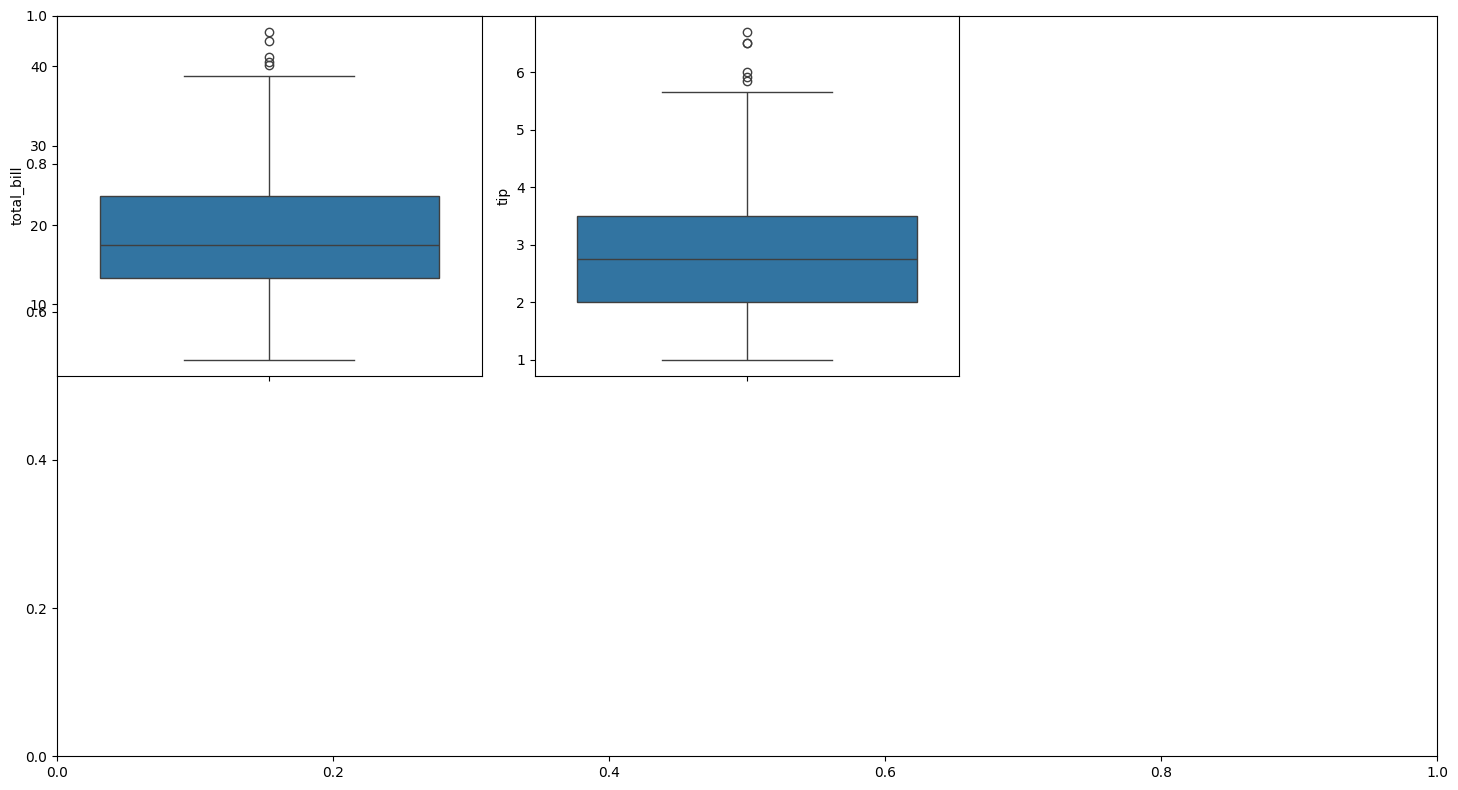

In [39]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sns.boxplot(tip[col])
plt.tight_layout()
plt.show()

In [17]:
tip.shape, tip[(tip['total_bill']<45) & (tip['tip']<7)].shape

((244, 7), (238, 7))

In [18]:
tip = tip[(tip['total_bill']<45) & (tip['tip']<7)]

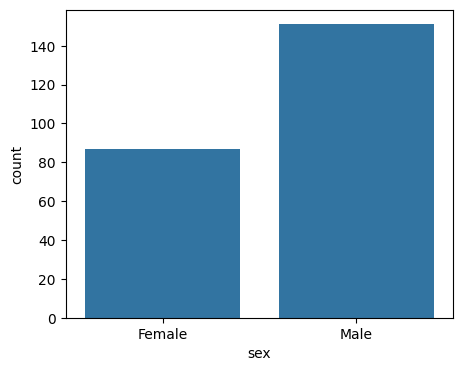

In [29]:
# bar plot for sex distribution
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=tip)
plt.show()


In [24]:
tip['sex'].value_counts()

,count
sex,
Male,151
Female,87


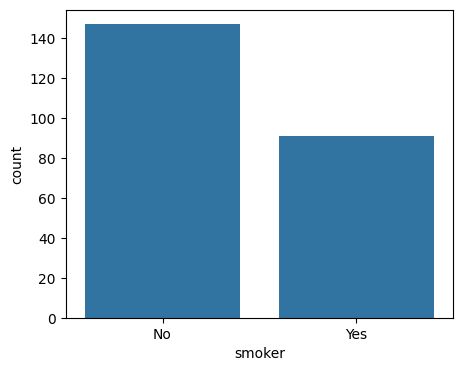

In [30]:
# bar plot for smoker distribution
plt.figure(figsize=(5,4))
sns.countplot(x='smoker', data=tip)
plt.show()

In [31]:
tip['smoker'].value_counts()

,count
smoker,
No,147
Yes,91


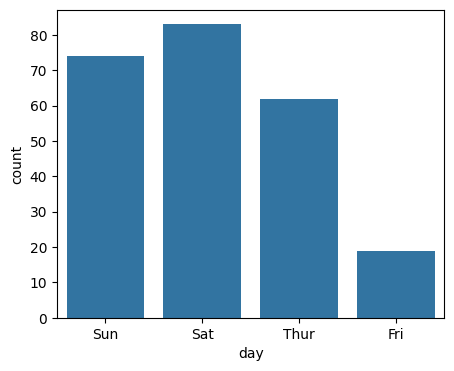

In [35]:
# bar plot for day distribution
plt.figure(figsize=(5,4))
sns.countplot(x='day', data=tip)
plt.show()

In [33]:
tip['day'].value_counts()

,count
day,
Sat,83
Sun,74
Thur,62
Fri,19


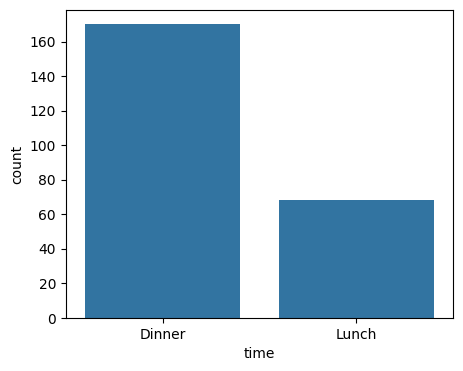

In [36]:
# bar plot for time distribution
plt.figure(figsize=(5,4))
sns.countplot(x='time', data=tip)
plt.show()

In [37]:
tip['time'].value_counts()

,count
time,
Dinner,170
Lunch,68


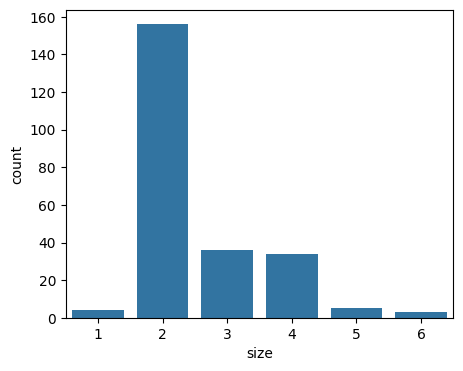

In [40]:
# bar plot for size distribution
plt.figure(figsize=(5,4))
sns.countplot(x='size', data=tip)
plt.show()

In [41]:
tip['size'].value_counts()

,count
size,
2,156
3,36
4,34
5,5
1,4
6,3


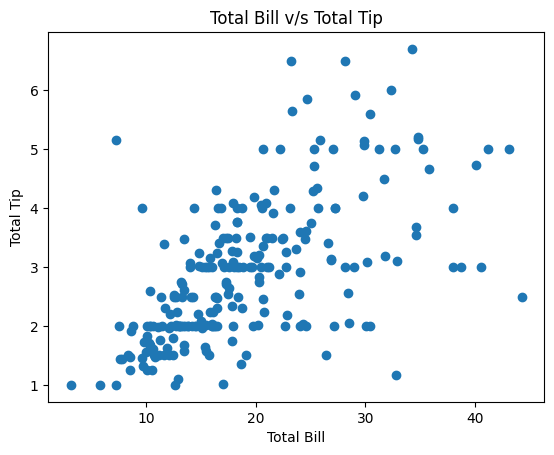

In [43]:
plt.scatter(tip['total_bill'], tip['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()

In [50]:
# set numeric_only parameter to True to avoid calculating the mean of non-numeric columns
tip.groupby(['size']).mean(numeric_only=True)

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


from matplotlib import pyplot as plt
_df_0['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tip'].plot(kind='hist', bins=20, title='tip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_bill']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_bill'}, axis=1)
              .sort_values('total_bill', ascending=True))
  xs = counted['total_bill']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('total_bill', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_bill')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['tip']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'tip'}, axis=1)
              .sort_values('tip', ascending=True))
  xs = counted['tip']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('tip', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tip')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['total_bill'].plot(kind='line', figsize=(8, 4), title='total_bill')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['tip'].plot(kind='line', figsize=(8, 4), title='tip')
plt.gca().spines[['top', 'right']].set_visible(False)

In [51]:
tip.groupby(['time']).mean(numeric_only=True)

,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


In [52]:
tip.groupby(['day']).mean(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


# **Data Preprocessing**

In [53]:
le= LabelEncoder()

tip['sex']=le.fit_transform(tip['sex'])
tip['smoker']=le.fit_transform(tip['smoker'])
tip['day']=le.fit_transform(tip['day'])
tip['time']=le.fit_transform(tip['time'])

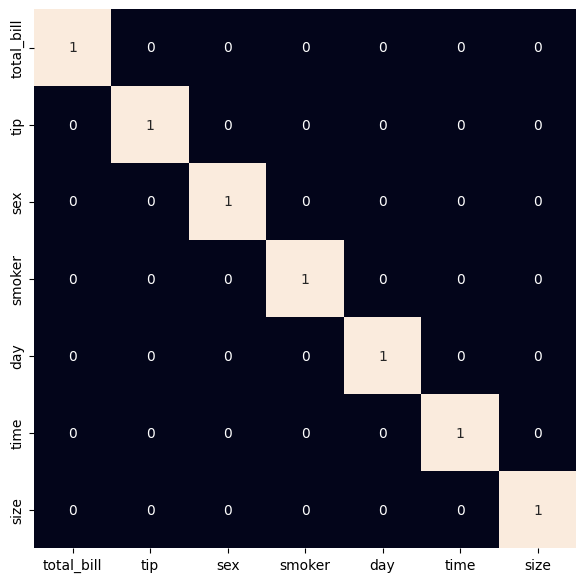

In [54]:
plt.figure(figsize=(7,7))
sns.heatmap(tip.corr() > 0.7, annot = True, cbar = False)
plt.show()

# **Model Development**

In [56]:
x = tip.drop('tip', axis=1)
y = tip['tip']

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=2)
X_train.shape, X_test.shape

((166, 6), (72, 6))

In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_test)

In [203]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [204]:
pred_train = model.predict(X_train)
print('Training Accuracy : ', metrics.r2_score(Y_train, pred_train))

pred_val = model.predict(X_val)
print('Validation Accuracy : ', metrics.r2_score(Y_test, pred_val))

Training Accuracy :  0.312135119037405
Validation Accuracy :  0.5960943731786132


In [ ]:
# Simple Gradio app for deploying the model

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

# Load dataset
tip = pd.read_csv('/content/tips.csv')

# Label encoders for each categorical feature
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()

# Fit encoders
tip['sex'] = le_sex.fit_transform(tip['sex'])
tip['smoker'] = le_smoker.fit_transform(tip['smoker'])
tip['day'] = le_day.fit_transform(tip['day'])
tip['time'] = le_time.fit_transform(tip['time'])

# Features and label
X = tip[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tip['tip']

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Prediction function
def predict_tip(total_bill, sex, smoker, day, time, size):
    try:
        # Create a single-row DataFrame
        input_data = pd.DataFrame({
            'total_bill': [total_bill],
            'sex': [le_sex.transform([sex])[0]],
            'smoker': [le_smoker.transform([smoker])[0]],
            'day': [le_day.transform([day])[0]],
            'time': [le_time.transform([time])[0]],
            'size': [size]
        })

        # Scale the input
        input_scaled = scaler.transform(input_data)

        # Predict
        prediction = model.predict(input_scaled)[0]
        return round(prediction, 2)

    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface
iface = gr.Interface(
    fn=predict_tip,
    inputs=[
        gr.Number(label="Total Bill"),
        gr.Dropdown(["Male", "Female"], label="Sex"),
        gr.Dropdown(["Yes", "No"], label="Smoker"),
        gr.Dropdown(["Thur", "Fri", "Sat", "Sun"], label="Day"),
        gr.Dropdown(["Dinner", "Lunch"], label="Time"),
        gr.Slider(minimum=1, maximum=10, step=1, label="Size")
    ],
    outputs=gr.Number(label="Predicted Tip"),
    title="Tip Prediction",
    description="Predict the tip amount based on customer information."
)

iface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c8f28aeb89fd36f577.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [206]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00
